In [254]:
import pandas as pd 

In [255]:
d1=pd.read_csv("hw2.1.csv",sep=";",index_col="id")
d2=pd.read_csv("hw2.2.csv",sep=";",index_col="id")

In [256]:
d1.head(1)

,gender,status,employed,income,extraIncome,expenses,buy
id,,,,,,,
LP001002,Male,No,No,5849.0,0.0,NaN,Y


In [257]:
d2.head(1)

,gender,status,employed,income,extraIncome,expenses,buy
id,,,,,,,
LP0010050,Male,No,No,43534.0,0.0,NaN,Y


In [258]:
d2.size

140

In [259]:
d1.size

210

In [260]:
df=pd.concat([d1,d2])
df.size

350

In [261]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, LP0010050 to LP0010069
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gender       20 non-null     object 
 1   status       16 non-null     object 
 2   employed     19 non-null     object 
 3   income       18 non-null     float64
 4   extraIncome  18 non-null     float64
 5   expenses     17 non-null     float64
 6   buy          18 non-null     object 
dtypes: float64(3), object(4)
memory usage: 1.2+ KB


In [262]:
df.isnull().sum()

gender          0
status         10
employed        4
income          7
extraIncome     6
expenses        6
buy             4
dtype: int64

In [263]:
df["income"].unique()

array([  5849.,   4583.,   3000.,   2583.,     nan,   5417.,   2333.,
         3036.,   4006.,   3200.,   2500.,   3073.,  45343.,   4444.,
        56334.,    564.,  34332.,  43534., 324324.,   3434.,  12841.,
         5676.,  21212.,  23243.,   6556.,   2232.,  32232.])

In [264]:
df["status"]=df["status"].fillna("yes")

In [265]:
df["income"]=df["income"].fillna(df["income"].mean())

In [266]:
pd.value_counts(df["employed"])

No     35
Yes    11
Name: employed, dtype: int64

In [267]:
df["employed"]=df["employed"].fillna("Yes")

In [268]:
df=df.dropna()
df.size

259

In [269]:
df.isnull().sum()

gender         0
status         0
employed       0
income         0
extraIncome    0
expenses       0
buy            0
dtype: int64

In [270]:
df.head()

,gender,status,employed,income,extraIncome,expenses,buy
id,,,,,,,
LP001003,Male,yes,No,4583.000000,1508.0,1111.0,N
LP001004,Male,Yes,Yes,3000.000000,0.0,66.0,Y
LP001005,Male,Yes,No,2583.000000,2358.0,120.0,Y
LP001006,Male,No,No,17550.837209,0.0,141.0,Y
LP001007,Male,Yes,Yes,5417.000000,4196.0,267.0,Y


In [271]:
x=df.iloc[[5,8,15],0:4]
x

,gender,status,employed,income
id,,,,
LP001010,Male,Yes,No,4006.0
LP001013,Male,yes,Yes,2500.0
LP001024,Male,Yes,No,4006.0


In [273]:
df["total_income"]=df["income"]+df["extraIncome"]
df.head()


,gender,status,employed,income,extraIncome,expenses,buy,total_income
id,,,,,,,,
LP001003,Male,yes,No,4583.000000,1508.0,1111.0,N,6091.000000
LP001004,Male,Yes,Yes,3000.000000,0.0,66.0,Y,3000.000000
LP001005,Male,Yes,No,2583.000000,2358.0,120.0,Y,4941.000000
LP001006,Male,No,No,17550.837209,0.0,141.0,Y,17550.837209
LP001007,Male,Yes,Yes,5417.000000,4196.0,267.0,Y,9613.000000


In [203]:
df[(df["status"] == "yes") & (df["employed"] == "Yes")]


,gender,status,employed,income,extraIncome,expenses,buy,total_income
id,,,,,,,,
LP001013,Male,yes,Yes,2500.0,1840.0,109.0,Y,4340.0
LP001027,Male,yes,Yes,564.0,6792.0,109.0,Y,7356.0
LP0010064,Male,yes,Yes,564.0,6792.0,109.0,Y,7356.0


In [280]:
df= df.sort_values(by="total_income",ascending=False)
df.head()

,gender,status,employed,income,extraIncome,expenses,buy,total_income
id,,,,,,,,
LP001017,Male,yes,No,4583.0,99905.0,128.0,N,104488.0
LP001020,Male,Yes,No,34332.0,56543.0,141.0,N,90875.0
LP001025,Male,Yes,Yes,56334.0,3467.0,349.0,N,59801.0
LP0010068,Male,Yes,No,2232.0,56543.0,141.0,N,58775.0
LP001021,Male,No,Yes,45343.0,4196.0,267.0,Y,49539.0


<AxesSubplot:xlabel='id'>

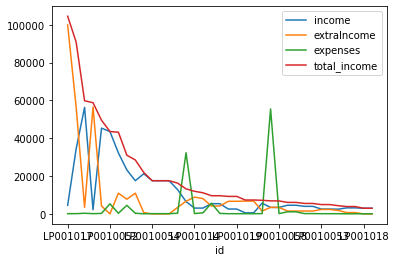

In [212]:
df.plot()

<AxesSubplot:>

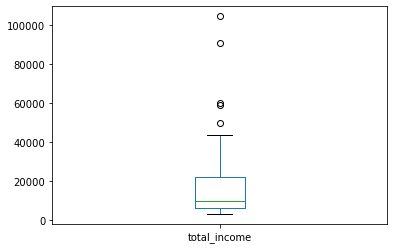

In [218]:
df["total_income"].plot(kind="box")